# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Trabajo Final**

**Asignatura**: Análisis y Modelización de Datos Categóricos.

**Autor**: Ignacio Fernández Sánchez-Pascuala.

## **Tarea 0:**


### *Enunciado*
Se consideran procesamientos de asesinatos múltiples en Florida entre 1976 y 1987:

| RazaVíctima | RazaAcusado | PenaMuerteSí | PenaMuerteNo | Porcentaje |
|-------------|-------------|--------------|--------------|------------|
| Blanca      | Blanco      | 53           | 414          | 11.3       |
| Blanca      | Negro       | 11           | 37           | 22.9       |
| Negro       | Blanco      | 0            | 16           | 0          |
| Negro       | Negro       | 4            | 139          | 2.8        |
| Total       | Blanco      | 53           | 430          | 11         |
| Total       | Negro       | 15           | 176          | 7.9        |

Calcula las razones de odds marginales y condicionales e interpreta resultados.

### *Solución*

Se define la razón de plausibilidad (odds ratio) como la relación entre la probabilidad de que ocurra un evento en un grupo y la probabilidad de que ocurra ese mismo evento en otro grupo. Matemáticamente, se expresa como:

$ \theta = \frac{\pi_1}{1-\pi_1} \div \frac{\pi_2}{1 -\pi_2} $

siendo $ \pi_i $ la probabilidad del suceso de interés o de éxito para el grupo $ i $.

Cuando se considera un factor condicional \( Z = k \) sobre un evento, la razón de plausibilidad condicional está determinada por la expresión:

$ \theta_{X,Y|Z=k} = \frac{n_{11}^k \cdot n_{22}^k}{n_{12}^k \cdot n_{21}^k} $

Suponiendo que se cumple la condición $ Z = k $, la distribución marginal se expresa como:

$ \theta_{X,Y} = \frac{n_{11+} \cdot n_{22+}}{n_{12+} \cdot n_{21+}} $

Esto se interpreta como la razón de plausibilidad de las variables categóricas $ X $ e $ Y $ sin tener en cuenta la condición $ Z $.


#### **Razones de plausibilidad marginal**

En el presente ejercicio, se define $ X $ como la raza de la víctima (Blanco o Negro), $ Y $ como la pena de muerte (Sí o No), y $ Z $ como la raza del acusado (Blanco o Negro).

In [ ]:
install.packages("vcd")
library(vcd)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



In [ ]:
vic.raza = c("blanca", "negra")
def.raza = vic.raza
pena.muerte = c("SI", "NO")
datalabel = list(acusado=def.raza,muerte=pena.muerte,
                 victima=vic.raza)

tabla = expand.grid(acusado=def.raza,muerte=pena.muerte,
                    victima=vic.raza)
data = c(53, 11, 414, 37, 0, 4, 16, 139)
tabla = cbind ( tabla , recuento = data )

temp = xtabs ( recuento ~ acusado + muerte + victima , data = tabla)
temp

, , victima = blanca

        muerte
acusado   SI  NO
  blanca  53 414
  negra   11  37

, , victima = negra

        muerte
acusado   SI  NO
  blanca   0  16
  negra    4 139


En función de la tabla de contingencia, se computan las razones de plausibilidad marginales como:

In [ ]:
 formulas <- c("acusado + muerte", "acusado + victima ", "victima + muerte ")
 marg_odds_ratio <- lapply(formulas, function(f) {
  formula <- as.formula(paste("recuento ~", f))
  df <- xtabs(formula, data = tabla)
  as.data.frame(loddsratio(df, log = FALSE))
 })
 marg_odds_ratio

acusado,muerte,OR,ASE
<fct>,<fct>,<dbl>,<dbl>
blanca:negra,SI:NO,1.446202,0.4423155
acusado,victima,OR,ASE
<fct>,<fct>,<dbl>,<dbl>
blanca:negra,blanca:negra,86.95443,26.44153
victima,muerte,OR,ASE
<fct>,<fct>,<dbl>,<dbl>
blanca:negra,SI:NO,5.498891,2.879939


Obteniéndose los siguientes resultados:
$ \theta_{XY} = 5.4989, \quad \theta_{XZ} = 86.9544, \quad \theta_{YZ} = 1.4462 $

Esto refleja que:

- Si no se tiene en cuenta la raza del acusado ( $Z$ ), las odds de que si la víctima es blanca se reciba pena de muerte es mayor que de que la reciba si la víctima es negra (un 550% superior).
- Si no se tiene en cuenta que hubo pena de muerte ($ Y $), la plausibilidad de que una persona blanca haya asesinado a otra persona blanca es mucho mayor (8695.44%). Lo mismo ocurre entre personas de raza negra. Por tanto, los asesinatos se dan más frecuentemente entre personas de la misma raza que entre personas de distinta raza.
- Si no se tiene en cuenta la raza de la víctima ($ X $), la plausibilidad de que alguien blanco sea condenado a muerte es un 44.62% mayor que cuando es negro.




#### **Razones de plausibilidad condicionales**

In [ ]:
loddsratio ( temp , log =F , stratum =3)

temp2 = xtabs ( recuento ~  victima + acusado + muerte  , data = tabla)
temp2
loddsratio ( temp2 , log =F , stratum =3)

temp3 = xtabs ( recuento ~ victima + muerte + acusado  , data = tabla)
temp3
loddsratio (temp3 , log =F , stratum =3)

 odds ratios for acusado and muerte by victima 

   blanca     negra 
0.4208843 0.9393939 

, , muerte = SI

        acusado
victima  blanca negra
  blanca     53    11
  negra       0     4

, , muerte = NO

        acusado
victima  blanca negra
  blanca    414    37
  negra      16   139


 odds ratios for victima and acusado by muerte 

      SI       NO 
41.86957 93.45091 

, , acusado = blanca

        muerte
victima   SI  NO
  blanca  53 414
  negra    0  16

, , acusado = negra

        muerte
victima   SI  NO
  blanca  11  37
  negra    4 139


 odds ratios for victima and muerte by acusado 

  blanca    negra 
4.259349 9.506667 

Se han obtenido las siguientes razones condicionales:

- Razón de plausibilidad condicionado a la raza de la víctima:
  \begin{cases}
    \theta_{X,Y,Z=z} = 0.4209 & \text{si la víctima es blanca, } Z = \text{Blanco} \\
    \theta_{X,Y,Z=z} = 0.9394 & \text{si la víctima es negra, } Z = \text{Negro}
  \end{cases}

  
- Razón de plausibilidad condicionado a la pena de muerte:
  \begin{cases}
    \theta_{X,Y=y,Z} = 41.8696 & \text{si hay pena de muerte, } Y = \text{Sí} \\
    \theta_{X,Y=y,Z} = 93.4510 & \text{si no hay pena de muerte, } Y = \text{No}
  \end{cases}

  
- Razón de plausibilidad condicionado a la raza del acusado:

  \begin{cases}
    \theta_{X=x,Y,Z} = 4.2593 & \text{si el acusado es blanco, } X = \text{Blanco} \\
    \theta_{X=x,Y,Z} = 9.5067 & \text{si el acusado es negro, } X = \text{Negro}
  \end{cases}


Se extrae para todos los casos que, si las víctimas son de raza negra, tienen 2.23 veces más posibilidades de ser sentenciadas por pena de muerte que si son de raza blanca.


 Sin más datos disponibles, se puede concluir que, durante el citado periodo de tiempo, en el Estado de Florida
 ha habido una discriminación por razas para los casos de asesinato multiple, en contra de la raza negra. Es
 decir, el sistema penitenciario del Estado de Florida durante esos años sentenció condenas racistas.

# **Análisis Base de Datos German Credit**

Para minimizar las pérdidas desde la perspectiva del banco, el banco necesita realizar un estudio y crear una regla de decisión con respecto a a quién otorgar la aprobación del préstamo y a quién no.

Los gerentes de préstamos consideran los perfiles demográficos y socioeconómicos de los solicitantes antes de tomar una decisión con respecto a su solicitud de préstamo.

Los Datos de German Credit contienen información sobre 20 variables y la clasificación de si un solicitante es considerado un riesgo de crédito Bueno o Malo para 1000 solicitantes de préstamos.

#### Limpieza de datos:

Leemos la base de datos:

In [ ]:
german_credit <- read.csv("german_credit.csv")

head(german_credit)

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,⋯,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,18,4,2,1049,1,2,4,2,⋯,4,2,21,3,1,1,3,1,1,1
2,1,1,9,4,0,2799,1,3,2,3,⋯,2,1,36,3,1,2,3,2,1,1
3,1,2,12,2,9,841,2,4,2,2,⋯,4,1,23,3,1,1,2,1,1,1
4,1,1,12,4,0,2122,1,3,3,3,⋯,2,1,39,3,1,2,2,2,1,2
5,1,1,12,4,0,2171,1,3,4,3,⋯,4,2,38,1,2,2,2,1,1,2
6,1,1,10,4,0,2241,1,2,1,3,⋯,3,1,48,3,1,2,2,2,1,2


Pasamos los valores numéricos a la categoría que representan en el dataset realmente. Esta información se encuentra en la fuente de la base de datos (https://online.stat.psu.edu/stat508/resource/analysis/gcd).

Primero se ha tenido que estudiar las frecuencias, para asegurar la categoría que correspondía a cada valor numerico:

In [ ]:
calcular_tabla_frecuencia <- function(data, variable) {
  # Calcular la tabla de frecuencia de la variable
  frecuencia <- table(data[[variable]])

  # Calcular el porcentaje de cada clase
  porcentaje <- prop.table(frecuencia) * 100

  # Mostrar los resultados
  resultado <- data.frame(Clase = names(frecuencia), Frecuencia = as.vector(frecuencia), Porcentaje = round(porcentaje, 2))
  return(resultado)
}


resultado <- calcular_tabla_frecuencia(german_credit, "Creditability")
resultado

Clase,Frecuencia,Porcentaje.Var1,Porcentaje.Freq
<chr>,<int>,<fct>,<dbl>
0,300,0,30
1,700,1,70


Además, se han juntado categorías dentro de algunas variables de forma lógica para que todas ellas tengan suficiente representación:

In [ ]:
# Agrupar categorías
german_credit$Account.Balance <- factor(german_credit$Account.Balance,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("No account", "None", "Some Balance", "Some Balance"))

german_credit$Payment.Status.of.Previous.Credit <- factor(german_credit$Payment.Status.of.Previous.Credit,
                                           levels = c(0,1, 2, 3, 4),
                                           labels = c("Some Problems", "Some Problems", "Paid Up", "No Problems","No Problems"))

german_credit$Value.Savings.Stocks <- factor(german_credit$Value.Savings.Stocks,
                                           levels = c(1, 2, 3, 4, 5),
                                           labels = c("None", "< 100 DM", "[100,1000] DM", "[100,1000] DM","> 1000 DM"))

german_credit$Length.of.current.employment <- factor(german_credit$Length.of.current.employment,
                                           levels = c(1, 2, 3, 4, 5),
                                           labels = c("< 1 Year/Unemployed", "< 1 Year/Unemployed", "[1,4)", "[4,7)","Above 7"))

german_credit$Sex...Marital.Status <- factor(german_credit$Sex...Marital.Status,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("Male Divorced/Single", "Male Divorced/Single","Male Married/Widowed", "Female"))

german_credit$No.of.Credits.at.this.Bank <- factor(german_credit$No.of.Credits.at.this.Bank,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("1", "> 1","> 1", "> 1"))

german_credit$Guarantors <- factor(german_credit$Guarantors,
                                           levels = c(1, 2, 3),
                                           labels = c("None", "Yes","Yes"))

german_credit$Concurrent.Credits <- factor(german_credit$Concurrent.Credits,
                                           levels = c(1, 2, 3),
                                           labels = c("Other Banks or Dept Stores", "Other Banks or Dept Stores","None"))

german_credit$Type.of.apartment <- factor(german_credit$Type.of.apartment,
                                           levels = c(1, 2, 3),
                                           labels = c("Free", "Rented","Owned"))

german_credit$No.of.dependents <- factor(german_credit$No.of.dependents,
                                           levels = c(1, 2),
                                           labels = c("3 or More", "Less than 3"))

german_credit$Instalment.per.cent <- factor(german_credit$Instalment.per.cent,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("> 35%","(25%,35%)","[20%,25%)","< 20%"))

german_credit$Purpose <- factor(german_credit$Purpose,
                                           levels = c(0,1, 2, 3,4,5,6,8,9,10),
                                           labels = c("Other", "New Car","Used Car","Home Related","Home Related","Home Related","Home Related","Other","Other","Other"))

german_credit$Duration.in.Current.address <- factor(german_credit$Duration.in.Current.address,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("< 1 Year","[1,4)","[4,7)","> 7"))

german_credit$Most.valuable.available.asset <- factor(german_credit$Most.valuable.available.asset,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("None","Car","Life Insurance","Real Estate"))

german_credit$Occupation <- factor(german_credit$Occupation,
                                           levels = c(1, 2, 3, 4),
                                           labels = c("Unemployed, unskilled","Unskilled Permanent Resident","Skilled","Executive"))

german_credit$Telephone <- factor(german_credit$Telephone,
                                           levels = c(1, 2),
                                           labels = c("No","Yes"))

german_credit$Creditability <- factor(german_credit$Creditability,
                                           levels = c(0, 1),
                                           labels = c("Bad","Good"))

german_credit <- german_credit[, -which(names(german_credit) == "Foreign.Worker")]

Se ha cambiado el nombre de las variables para que sean más legibles

In [ ]:
names(german_credit)[names(german_credit) == "Duration.of.Credit..month."] <- "Duration"
names(german_credit)[names(german_credit) == "Age..years."] <- "Age"
names(german_credit)[names(german_credit) == "Credit.Amount"] <- "Amount"
names(german_credit)[names(german_credit) == "Type.of.apartment"] <- "Housing"
names(german_credit)[names(german_credit) == "No.of.Credits.at.this.Bank"] <- "Num_Credits"
names(german_credit)[names(german_credit) == "Length.of.current.employment"] <- "Employment_Length"
names(german_credit)[names(german_credit) == "Value.Savings.Stocks"] <- "Savings"
names(german_credit)[names(german_credit) == "Payment.Status.of.Previous.Credit"] <- "Previous_Credit"
names(german_credit)[names(german_credit) == "Account.Balance"] <- "Account_Balance"
names(german_credit)[names(german_credit) == "Instalment.per.cent"] <- "Instalment"
names(german_credit)[names(german_credit) == "Sex...Marital.Status"] <- "Sex/Martial"
names(german_credit)[names(german_credit) == "Duration.in.Current.address"] <- "Duration_Adress"
names(german_credit)[names(german_credit) == "Most.valuable.available.asset"] <- "Valuable_Asset"
names(german_credit)[names(german_credit) == "Concurrent.Credits"] <- "Concurrent_Credits"
names(german_credit)[names(german_credit) == "No.of.dependents"] <- "Num_Dependents"

A continuación, se muestra una descripción de la base de datos ya adaptada, con las frecuencias de las variables categóricas, y algunas métricas en las variables continuas (media, mínimo, máximo..). También se incluye una pequeña muestra de los datos:

In [ ]:
summary(german_credit)

head(german_credit)

 Creditability     Account_Balance    Duration         Previous_Credit
 Bad :300      No account  :274    Min.   : 4.0   Some Problems: 89   
 Good:700      None        :269    1st Qu.:12.0   Paid Up      :530   
               Some Balance:457    Median :18.0   No Problems  :381   
                                   Mean   :20.9                       
                                   3rd Qu.:24.0                       
                                   Max.   :72.0                       
         Purpose        Amount               Savings   
 Other       :352   Min.   :  250   None         :603  
 New Car     :103   1st Qu.: 1366   < 100 DM     :103  
 Used Car    :181   Median : 2320   [100,1000] DM:111  
 Home Related:364   Mean   : 3271   > 1000 DM    :183  
                    3rd Qu.: 3972                      
                    Max.   :18424                      
           Employment_Length     Instalment                Sex/Martial 
 < 1 Year/Unemployed:234     > 35%    :

,Creditability,Account_Balance,Duration,Previous_Credit,Purpose,Amount,Savings,Employment_Length,Instalment,Sex/Martial,Guarantors,Duration_Adress,Valuable_Asset,Age,Concurrent_Credits,Housing,Num_Credits,Occupation,Num_Dependents,Telephone
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Good,No account,18,No Problems,Used Car,1049,None,< 1 Year/Unemployed,< 20%,Male Divorced/Single,None,> 7,Car,21,None,Free,1,Skilled,3 or More,No
2,Good,No account,9,No Problems,Other,2799,None,"[1,4)","(25%,35%)",Male Married/Widowed,None,"[1,4)",None,36,None,Free,> 1,Skilled,Less than 3,No
3,Good,None,12,Paid Up,Other,841,< 100 DM,"[4,7)","(25%,35%)",Male Divorced/Single,None,> 7,None,23,None,Free,1,Unskilled Permanent Resident,3 or More,No
4,Good,No account,12,No Problems,Other,2122,None,"[1,4)","[20%,25%)",Male Married/Widowed,None,"[1,4)",None,39,None,Free,> 1,Unskilled Permanent Resident,Less than 3,No
5,Good,No account,12,No Problems,Other,2171,None,"[1,4)",< 20%,Male Married/Widowed,None,> 7,Car,38,Other Banks or Dept Stores,Rented,> 1,Unskilled Permanent Resident,3 or More,No
6,Good,No account,10,No Problems,Other,2241,None,< 1 Year/Unemployed,> 35%,Male Married/Widowed,None,"[4,7)",None,48,None,Free,> 1,Unskilled Permanent Resident,Less than 3,No


Se observa que no hay valores missings, y que nuestra base de datos está desbalanceada respecto a la variable objetivo, ya que hay 300 de clase "Bad" y 700 de clase "Good".

### Descipción de las variables de la base de datos:

- **Creditability:** Categórica binaria. Confiabilidad de que devuelva el credito -> Bad & Good.
- **Duration:** Continua. Duración del prestamo en meses.
- **Amount:** Continua. Cantidad de crédito solicitada.
- **Age:** Continua. Edad del cliente.
- **Purpose:** Categórica Nominal.  Propósito del crédito-> New Car, Used Car, Home Related & Other.
- **Housing:** Categorica. Tipo de vivienda del solicitante-> Free, Rented & Owned.
- **Telephone:** Categorica binaria. Disponibilidad teléfono cliente -> Yes & No.
- **Occupation:** Categorica. Tipo de trabajo del solicitante - > Unemployed/unskilled, Unskilled Permanent Resident,	Skilled &	Executive.
- **Num_Credits:** Categorica binaria. Número de creditos en este banco -> 1 & Above 1.
- **Employment_length:** Categórica. Duración del trabajo actual ->  Bellow 1 Year/Unemployed, [1,4), [4,7) & Above 7
- **Savings:** Categorica. Ahorros del cliente -> None, Below 100 DM, [100, 1000] DM & Above 1000 DM.
- **Previous_Credit:** Categorica. Estado de pago del crédito anterior -> Some Problems, Paid Up & No Problems (in this bank).
- **Account_Balance:** Categorica. Estado o saldo de la cuenta bancaria del solicitante- > No account, None & Some Balance.
- **Instalment:** Categorica. Porcentaje de los ingresos disponibles que se destinan a los pagos de cuotas o préstamos - > Above 35%,	(25%, 35%),	[20%, 25%) &	Below 20%.
- **Sex/Martial:** Categorica. Género y el estado civil del solicitante-> Male Divorced/Single, Male Married/Widowed & Female.
- **Guarantors:** Categórica binaria. Tipo de garante o fiador asociado con la solicitud de crédito -> None & Yes.
- **Duration_Adress:** Categórica. Duración de residencia en la dirección actual -> Bellow 1 Year,	[1, 4),	[4, 7)	& Above 7.
- **Valuable_Asset:** Categorica. Activo más valioso -> None,	Car,	Life Insurance	& Real Estate.
- **Concurrent_Credits:** Categorica binaria. Situación crediticia simultánea del solicitante de crédito en otras instituciones financieras -> Other Banks or Dept Stores & None.
- **Num_Dependents:** Categorica binaria. Cantidad de personas que dependen económicamente del solicitante de crédito-> 3 or More &	Less than 3.


## **Tarea 1:**
#### 1- Tablas de Contingencia y Gráficos de Cajas y Bigotes.

En nuestro caso, hemos estudiado las relaciones de las variables con la variable Crediatibility, ya que es de la que se quiere extraer información durante el estudio, y que será nuestra variable objetivo en un futuro.

Se quiere ver que clientes son más propensos a ser rechazados de obtener un crédito debido a su riesgo de no devolverlo o viceversa.

Instalación de librerias:

In [ ]:

if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

Loading required package: ggplot2



In [ ]:
if (!requireNamespace("gmodels", quietly = TRUE)) {
  install.packages("gmodels")
}
library(gmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




Tablas de contingencia para las categóricas:

In [ ]:
generate_contingency_tables <- function(dataframe, response_variable) {
  categorical_vars <- sapply(dataframe, is.factor)

  # Iterar sobre cada variable categórica
  for (var in names(dataframe)[categorical_vars]) {
    if (var != response_variable) {  # Evitar la variable de respuesta
      cat("Tabla de contingencia entre", response_variable, "y", var, ":\n")

      # Crear la tabla de contingencia
      contingency_table <- table(dataframe[[response_variable]], dataframe[[var]])
      dimnames(contingency_table) <- list(Creditability = rownames(contingency_table), Variable = colnames(contingency_table))

      # Imprimir la tabla de contingencia con los nombres de las variables
      print(contingency_table)

      cat("\n")
    }
  }
}

# Uso de la función con tu dataset 'German Credit' y la variable 'Creditability'
generate_contingency_tables(german_credit, "Creditability")



Tabla de contingencia entre Creditability y Account_Balance :
             Variable
Creditability No account None Some Balance
         Bad         135  105           60
         Good        139  164          397

Tabla de contingencia entre Creditability y Previous_Credit :
             Variable
Creditability Some Problems Paid Up No Problems
         Bad             53     169          78
         Good            36     361         303

Tabla de contingencia entre Creditability y Purpose :
             Variable
Creditability Other New Car Used Car Home Related
         Bad    129      17       58           96
         Good   223      86      123          268

Tabla de contingencia entre Creditability y Savings :
             Variable
Creditability None < 100 DM [100,1000] DM > 1000 DM
         Bad   217       34            17        32
         Good  386       69            94       151

Tabla de contingencia entre Creditability y Employment_Length :
             Variable
Creditabili

Gráficos de Caja y Bigotes para las variables continuas frente a la variable respuesta:

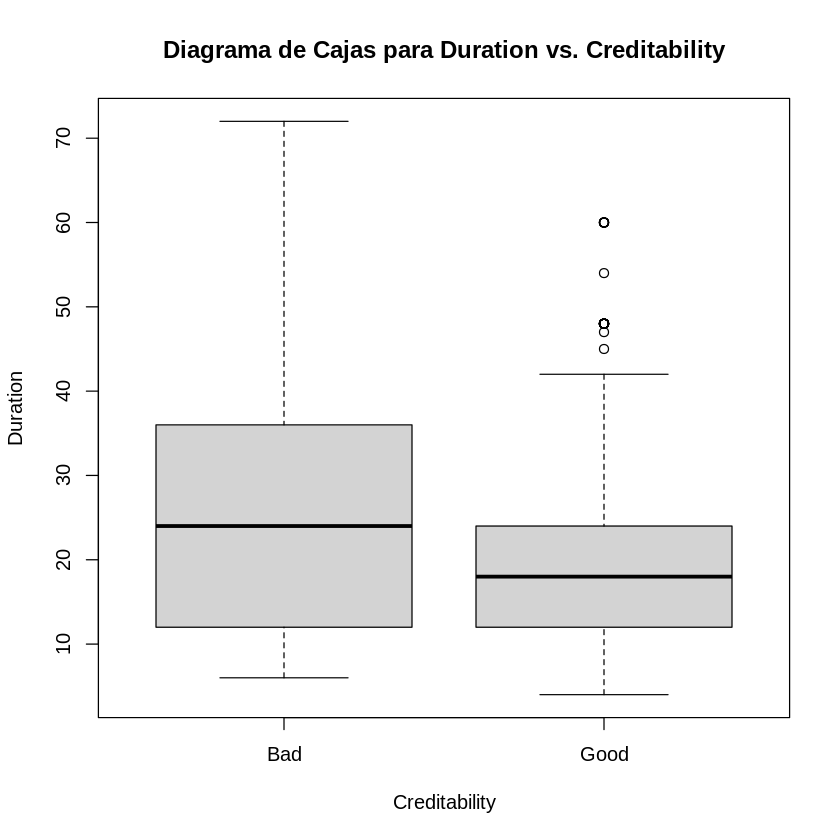

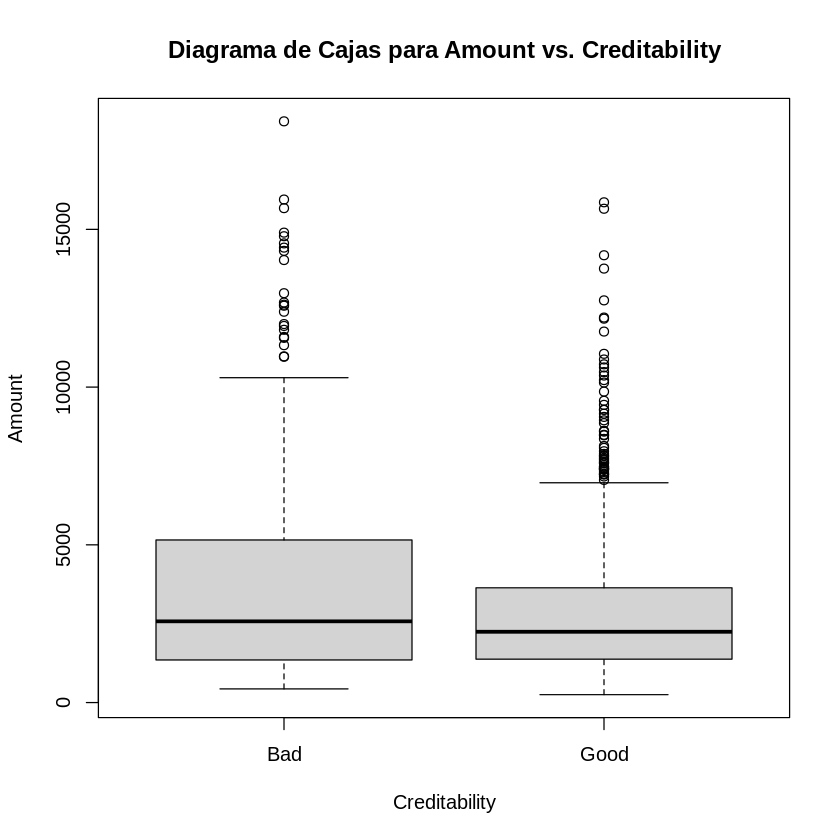

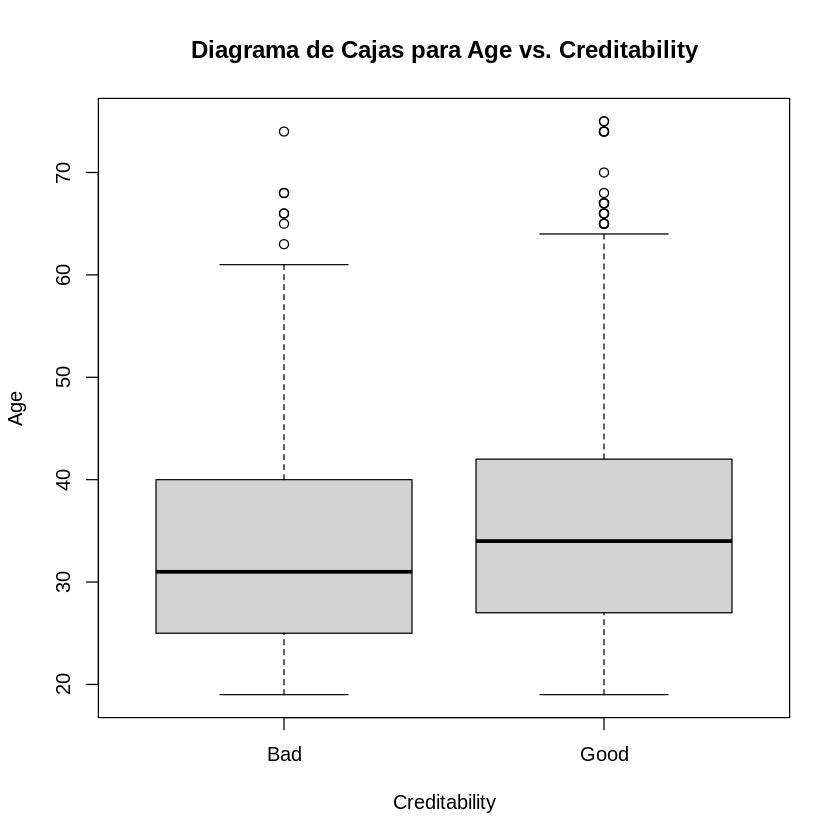

In [ ]:
generate_boxplots <- function(dataframe, response_variable) {
  # Obtener las columnas continuas del dataframe
  numeric_vars <- sapply(dataframe, is.numeric)

  # Iterar sobre cada variable continua
  for (var in names(dataframe)[numeric_vars]) {
    # Crear el diagrama de cajas
    boxplot(dataframe[[var]] ~ dataframe[[response_variable]],
            data = dataframe,
            main = paste("Diagrama de Cajas para", var, "vs. Creditability"),
            xlab = "Creditability",
            ylab = var)
  }
}

# Uso de la función con tu dataset 'German Credit' y la variable 'Creditability'
generate_boxplots(german_credit, "Creditability")

##### Algunas Observaciones:
- La mayoría de los clientes clasificados como "Good" tienen un historial de crédito "Paid Up" o "No Problems", mientras que las observaciones clasificadas como "Bad" tienden a tener problemas previos de crédito o algún problema actual. Esto sugiere que el historial de crédito puede ser un predictor importante de la capacidad de pago.
- Los clientes que tienen algo de saldo en sus cuentas (Some balance) son más propensos a devolver el crédito.
- En la variable Purpose, los clientes clasificados como "Good" tienen proporciones más altas en categorías como "New Car" y "Home Related", mientras que las observaciones clasificadas como "Bad" tienen proporciones más altas en la categoría "Other".
- Los clientes clasificados como "Good" tienden a tener mayores ahorros (Savings) en comparación con los clasificados como "Bad". Esto sugiere que un mayor nivel de ahorro puede estar asociado con una menor probabilidad de incumplimiento.
- Hay una ligera tendencia a que las observaciones clasificadas como "Good" tengan períodos de empleo más largos.
- Los créditos de mayor duración y mayor cantidad tienen mayor tendencia de riesgo. Sin embargo, la edad parece no ser muy determinante.
-Hay algunas variables como Occupation o Guarantors, donde no está muy claro su impacto sobre la variable respuesta, ya que mantienen proporciones parecidas las distintas categorías.

#### 2. Comparación de grupos con DP, RR, OR, junto con los Intervalos de Confianza al 95%.

**Diferencia de proporciones (PD)**

La diferencia de proporciones (proportion difference, PD) se define como la diferencia entre la probabilidad de que ocurra un evento en un grupo y la probabilidad de que ocurra ese mismo evento en otro grupo. Analíticamente:
$ DP = \pi_1 - \pi_2 $
siendo $\pi_i$ la probabilidad del suceso de referencia o de éxito para el grupo $i$.

**Riesgo Relativo (RR)**

El riesgo relativo (relative risk, RR) se define como la proporción de la probabilidad de que ocurra un evento en un grupo en comparación con la probabilidad de que ocurra ese mismo evento en otro grupo. Analíticamente:
$ RR = \frac{\pi_1}{\pi_2} $

**Razón de plausibilidad (OR)**

Se define la razón de plausibilidad (odds ratio, OR o $\theta$) como la relación de que ocurra un evento en un grupo frente a la posibilidad de que ocurra ese mismo evento en otro grupo. Analíticamente:
$ \theta = \frac{\pi_1 / (1 - \pi_1)}{\pi_2 / (1 - \pi_2)} $


In [ ]:
Wald.ci = function (Table , aff.response , alpha =.05 ){
  # Gives two - sided Wald CI 's for odds ratio ,
  # difference in proportions and relative risk.
  # Table is a 2x2 table of counts with rows giving
  # the treatment populations
  # aff.response is a string like "c (1 ,1)" giving the cell
  # of the beneficial response and the treatment category
  # alpha is significance level
  pow = function (x, a= -1) x^a
  z.alpha = qnorm (1- alpha /2)
  if( is.character ( aff.response ))
    where = eval ( parse ( text = aff.response ))
  else where = aff.response
  Next = as.numeric ( where ==1) + 1

  # OR
  odds.ratio = Table [ where [1] , where [2]] * Table [ Next [1] , Next [2]] /
    ( Table [ where [1] , Next [2]] * Table [ Next [1] , where [2]])
  se.OR = sqrt (sum(pow( Table )))
  ci.OR = exp(log( odds.ratio ) + c( -1 ,1)* z.alpha * se.OR )

  # difference of proportions
  p1 = Table [ where [1] , where [2]] /(n1= Table [ where [1] , Next [2]] +
                                          Table [ where [1] , where [2]])
  p2= Table [ Next [1] , where [2]] /(n2= Table [ Next [1] , where [2]] +
                                        Table [ Next [1] , Next [2]])
  se.diff = sqrt (p1*(1- p1)/n1 + p2*(1- p2)/n2)
  ci.diff = (p1 -p2) + c( -1 ,1)* z.alpha * se.diff

  # relative risk
  RR = p1/p2
  se.RR = sqrt ((1 - p1)/(p1*n1) + (1- p2)/(p2*n2 ))
  ci.RR = exp(log(RR) + c( -1 ,1)* z.alpha * se.RR )
  list (OR= list ( odds.ratio = odds.ratio , CI= ci.OR ),
        proportion.difference = list ( diff =p1 -p2 , CI= ci.diff ),
        relative.risk = list ( relative.risk =RR , CI= ci.RR ))
}

Se realiza este estudio sobre las variables con 2 categorias, ya que éstas son las que tienen sentido a la hora de calcular el DP, RR y OR.

Estas on las variables Num_Dependents, Telephone, Num_Credits, Concurrent_Credits y Guarantors.

In [ ]:
calculate_wald_ci<-function(data,vars){
 for(var in vars){
  contingency_table<-table(data[[var]],data$Creditability)
  result<-Wald.ci(contingency_table,"c(1,1)")
  cat("Análisis de la variable `",var,"` en términos de PD, RR, OR\n")
  cat('--------------------------------------------------------------\n')

  print(result)
  cat('--------------------------------------------------------------\n')
 }
}
# Ejecutar la función con las variables citadas
calculate_wald_ci(german_credit, c("Num_Dependents", "Telephone", "Num_Credits", "Concurrent_Credits", "Guarantors"))

Análisis de la variable ` Num_Dependents ` en términos de PD, RR, OR
--------------------------------------------------------------
$OR
$OR$odds.ratio
[1] 1.018392

$OR$CI
[1] 0.7001618 1.4812603


$proportion.difference
$proportion.difference$diff
[1] 0.003817522

$proportion.difference$CI
[1] -0.07446451  0.08209956


$relative.risk
$relative.risk$relative.risk
[1] 1.012863

$relative.risk$CI
[1] 0.7784306 1.3178981


--------------------------------------------------------------
Análisis de la variable ` Telephone ` en términos de PD, RR, OR
--------------------------------------------------------------
$OR
$OR$odds.ratio
[1] 1.177424

$OR$CI
[1] 0.8919049 1.5543439


$proportion.difference
$proportion.difference$diff
[1] 0.03405542

$proportion.difference$CI
[1] -0.02342038  0.09153122


$relative.risk
$relative.risk$relative.risk
[1] 1.121756

$relative.risk$CI
[1] 0.9217027 1.3652296


--------------------------------------------------------------
Análisis de la variable ` Num_Cr

### Observaciones:
- No parece haber relaciones entre el Num_Dependents y el riesgo de crédito, ya que el odds ratio y el riesgo relativo son practicamente 1, y la diferencia de proporciones 0, además con intervalos de confianza no muy anchos. Pasa lo mismo con la variable Guarantors. Parece que no hay asociaciones con la variable objetivo.
- Parece ligeramente que los usuarios que no proporcionan el teléfono son más propensos a tener riesgo en devolver el crédito. Lo mismo pasa con los usuarios que sólo tienen un crédito en el banco.
- Por último, se ve que los usuarios que tienen algún tipo de crédito fuera de este banco, son clientes de mucho riesgo a no devolver el crédito.

#### 3. Estudio influencia de una tercera variable.

**Razones de plausibilidad condicionales**

Dado un factor condicional $Z = k$ sobre un evento, la razón de plausibilidad condicional (conditional odds ratios) está dada por la expresión:

$ \theta_{X,Y|Z=k} = \frac{n_{11}^k \cdot n_{22}^k}{n_{12}^k \cdot n_{21}^k} $


Veamos por ejemplo si el riesgo de no pagar de los clientes al tener créditos fuera de este banco, se acentúa según la cantidad del préstamo es mayor. Para ello, categorizamos la variable Amount, que es continua, en 3 categorias.

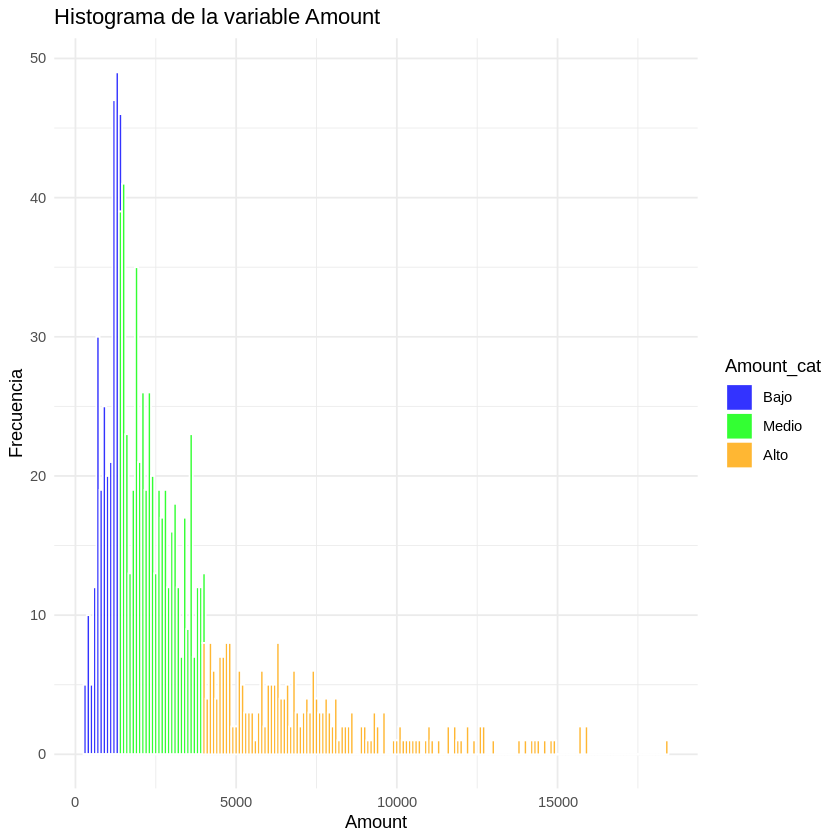

In [ ]:
library(ggplot2)

# Calcula los quantiles para definir los rangos bajo, medio y alto
quantiles_amount <- quantile(german_credit$Amount, probs = c(0.25, 0.75))

# Crea la variable categórica Amount_cat basada en los quantiles
Amount_cat <- cut(german_credit$Amount,
                                breaks = c(-Inf, quantiles_amount, Inf),
                                labels = c("Bajo", "Medio","Alto"))

# Crea el histograma con ggplot2 y diferencia los colores por los rangos
ggplot(german_credit, aes(x = Amount, fill = Amount_cat)) +
  geom_histogram(binwidth = 100, color = "white", alpha = 0.8) +
  scale_fill_manual(values = c("blue", "green", "orange")) +
  labs(title = "Histograma de la variable Amount",
       x = "Amount",
       y = "Frecuencia") +
  theme_minimal()

In [ ]:
# Obtén la tabla de contingencia para las variables X, Y y Z
contingency_table <- table(german_credit$Creditability, german_credit$Concurrent_Credits, Amount_cat)

# Obtén las categorías de la variable Z
categorias_Z <- unique(Amount_cat)

# Calcula las razones de odds condicionales para cada nivel de la variable Z
cond_odds_ratios <- array(NA, dim = 3)
for (i in 1:dim(contingency_table)[3]) {
  n_11 <- contingency_table[1, 1, i]
  n_22 <- contingency_table[2, 2, i]
  n_12 <- contingency_table[1, 2, i]
  n_21 <- contingency_table[2, 1, i]
  cond_odds_ratios[i] <- (n_11 * n_22) / (n_12 * n_21)
}

# Combina los resultados con las categorías de la variable Z
resultados <- data.frame(Categoria_Z = categorias_Z, Razones_de_odds_condicionales = cond_odds_ratios)

# Resultados
print(resultados)

  Categoria_Z Razones_de_odds_condicionales
1        Bajo                      2.843952
2       Medio                      1.430987
3        Alto                      1.671429


Es curioso, parece que los créditos de cantidad baja son los que más riesgo tienen de no ser devueltos por gente que tiene créditos además en otros bancos. Sin embargo cantidades medias y sobretodo altas, tienden a tener menos riesgo a devolver su dinero los clientes que tienen créditos en otras instituciones.

Esto puede ser debido a que los clientes con diversos créditos en distintos bancos tienen mayor poder económico, y mayor posibilidad de devolución. Por tanto, existe interacción.

#### 4. Hipótesis independencia/asociación entre variables.
**Test de Contingencia de χ2**

El test de contingencia de Chi-cuadrado (χ2) se utiliza para determinar si existe una asociación significativa entre dos variables categóricas. La hipótesis nula (H0) afirma que no hay asociación entre las variables, mientras que la hipótesis alternativa (H1) sugiere que hay una asociación significativa.

**Test Exacto de Fisher**

El test exacto de Fisher es una prueba no paramétrica utilizada para determinar si hay una asociación significativa entre dos variables categóricas en una tabla de contingencia. Este test es útil cuando las condiciones para el test de χ2 no se cumplen, especialmente cuando el tamaño muestral es pequeño.

**Prueba de Mantel-Haenszel para Independencia Condicional**

La prueba de Mantel-Haenszel es una técnica estadística utilizada para determinar si hay una asociación significativa entre dos variables categóricas después de controlar una tercera variable.

**Prueba T de Student**

La prueba t de Student es una prueba estadística utilizada para determinar si hay una diferencia significativa entre las medias de dos grupos. En el contexto de variables continuas respecto a una variable respuesta categórica, la prueba t se utiliza para comparar las medias de las variables continuas entre los dos grupos definidos por la variable respuesta. La hipótesis nula (H0) afirma que no hay diferencia significativa entre las medias de los dos grupos, mientras que la hipótesis alternativa (H1) sugiere que sí hay diferencia significativa.


Dado que el número de predictores en este problema no es muy alto, es posible analizar la dependencia de la variable respuesta (Creditabilidad) en cada uno de ellos de manera individual.

En nuestro caso, ya que la muestra es considerable, se ha considerado el Test de Chi-Cuadrado para estudiar la dependencia en las variables categóricas. La siguiente tabla resume los valores p de la prueba de chi-cuadrado para cada tabla de contingencia en las variables categóricas:

In [ ]:
# Obtener las columnas categóricas del dataframe
categorical_vars <- sapply(german_credit, is.factor)

# Crear un dataframe vacío para almacenar los resultados
chi_square_results <- data.frame(Variable = character(), P_Value = character())

# Calcular el valor p para cada variable categórica
for (var in names(german_credit)[categorical_vars]) {
  if (var != "Creditability") {  # Evitar la variable de respuesta
    contingency_table <- table(german_credit$Creditability, german_credit[[var]])
    chi_square_test <- chisq.test(contingency_table)
    p_value_formatted <- sprintf("%.2f", chi_square_test$p.value)  # Formatear el p-valor
    chi_square_results <- rbind(chi_square_results, data.frame(Variable = var, P_Value = p_value_formatted))
  }
}

# Imprimir el título
cat("Tabla de resultados del test chi-cuadrado:\n")
# Imprimir la tabla
chi_square_results


Tabla de resultados del test chi-cuadrado:


Variable,P_Value
<chr>,<chr>
Account_Balance,0.00
Previous_Credit,0.00
Purpose,0.00
Savings,0.00
Employment_Length,0.00
Instalment,0.14
Sex/Martial,0.01
Guarantors,1.00
Duration_Adress,0.86


Las variables Account_Balance, Previous_Credit, Purpose, Savings, Employment_Length, Sex/Martial, Housing, Concurrent_credits y Valuable_Asset tienen asociación significativa con la variable respuesta. La variable Instalment está en el limite con un 0.14 en el p-valor.

Destaca el p-valor de 0.58 de la variable Occupation, ya que se podría pensar a priori que debe ser importante sobre la variable respuesta. Sin embargo, el p-valor de 0.86 en la variable Duartion_Adress tiene sentido, ya que no debería tener relación (dependencia) con el riesgo de crédito.

Para las variables continuas, nos fijamos en el T-test:

In [ ]:
# Identificar las variables numéricas en el conjunto de datos
numeric_vars <- sapply(german_credit, is.numeric)

# Crear un data frame para almacenar los resultados
t_test_results <- data.frame(Variable = character(),
                              Media_Good = numeric(),
                              Media_Bad = numeric(),
                              P_Value = numeric(),
                              stringsAsFactors = FALSE)

# Calcular la media y realizar la prueba t de Student para cada variable numérica
for (var in names(german_credit)[numeric_vars]) {
  if (var != "Creditability") {  # Evitar la variable de respuesta
    # Calcular la media para Good y Bad
    media_good <- mean(german_credit[german_credit$Creditability == "Good", var])
    media_bad <- mean(german_credit[german_credit$Creditability == "Bad", var])

    # Realizar la prueba t de Student
    t_test_result <- t.test(german_credit[german_credit$Creditability == "Good", var],
                            german_credit[german_credit$Creditability == "Bad", var])

    # Almacenar los resultados en el data frame
    t_test_results <- rbind(t_test_results, data.frame(Variable = var,
                                                       Media_Good = media_good,
                                                       Media_Bad = media_bad,
                                                       P_Value = t_test_result$p.value))
  }
}

# Mostrar la tabla de resultados
t_test_results

Variable,Media_Good,Media_Bad,P_Value
<chr>,<dbl>,<dbl>,<dbl>
Duration,19.20714,24.860,2.404081e-10
Amount,2985.44286,3938.127,2.477103e-05
Age,36.22000,33.960,3.778175e-03


Como vemos, todas las variables continuas tienen asociación significativa en cuánto a la diferencia de medias con la variable respuesta.

## **Tarea 2**
#### 1. Objetivo

El objetivo será crear un modelo de predicción para detectar los clientes más propensos a devolver el crédito a futuro.

Se inferirá un modelo a partir de los datos de clientes ya registrados, y el objetivo será aplicar el modelo a nuevos clientes para predecir su riesgo de devolver o no el crédito.

La variable respuesta será Crediability, de carácter binario, ya que toma 2 categorias. Por tanto se aplicará un modelo de regresión logística.

Para evaluar el rendimiento del modelo, se separará los datos en entrenamiento, donde se entrenará el modelo, y test, donde se avaluará las capacidades del modelo entrenado.

#### 2. Selección de variables:

En primer lugar, se separa el conjunto de datos en Test (30%) y Train (70%). Como la variable respuesta en nuestros datos está desbalanceada, intentamos realizar una partición estratificada. Para ello, se usa el paquete caret de R.

In [ ]:
# Instalar y cargar el paquete caret si no está instalado
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}
library(caret)

# Fijar la semilla
set.seed(123)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
index <- createDataPartition(german_credit$Creditability, p = 0.7, list = FALSE)

#Las necesitaremos posteriormente, las dejamos ya creadas para que esten en train y test.
german_credit$Savings_ord <- as.integer(factor(german_credit$Savings, ordered = TRUE, levels = c("None", "< 100 DM", "[100,1000] DM", "> 1000 DM")))
german_credit$Employment_Length_ord <- as.integer(factor(german_credit$Employment_Length, ordered = TRUE, levels = c("< 1 Year/Unemployed", "[1,4)", "[4,7)", "Above 7")))
german_credit$Instalment_ord <- as.integer(factor(german_credit$Instalment, ordered = TRUE, levels = c("< 20%", "[20%,25%)","(25%,35%)","> 35%")))

# Crear conjuntos de datos de entrenamiento y prueba
train_data <- german_credit[index, ]
test_data <- german_credit[-index, ]

Solo vamos a considerar las variables que tienen asociación significativa con la variable respuesta, siendo éstas las variables categóricas Account_Balance, Previous_Credit, Purpose, Savings, Employment_Length, Sex/Martial, Housing, Concurrent_credits , Instalment y Valuable_Asset, y las variables continuas Age, Duration y Amount.

Esto ha sido estudiado en la tarea anterior con los respectivos test de la chi-cuadrado y T-test.

Para las variables continuas, para asegurarnos más que tiene sentido incluirlas en la regresión logística, podemos ajustar un modelo de ellas frente a la variable objetivo por separado, y ver si el modelo es significativo en cuanto al p-valor (test de Wald):

$
W = \frac{{(\hat{\beta} - \beta_0)^2}}{{\text{Var}(\hat{\beta})}}
$

donde $\hat{\beta}$ es el estimador de máxima verosimilitud para el coeficiente de regresión de la variable continua, $\beta_0$ es el valor nulo bajo la hipótesis de que el coeficiente es cero y $\text{Var}(\hat{\beta})$ es la varianza de $\hat{\beta}$. $W$ sigue una distribución chi-cuadrado con 1 grado de libertad bajo la hipótesis nula de que el coeficiente es cero.

P-valor para Age : 0.002009811 


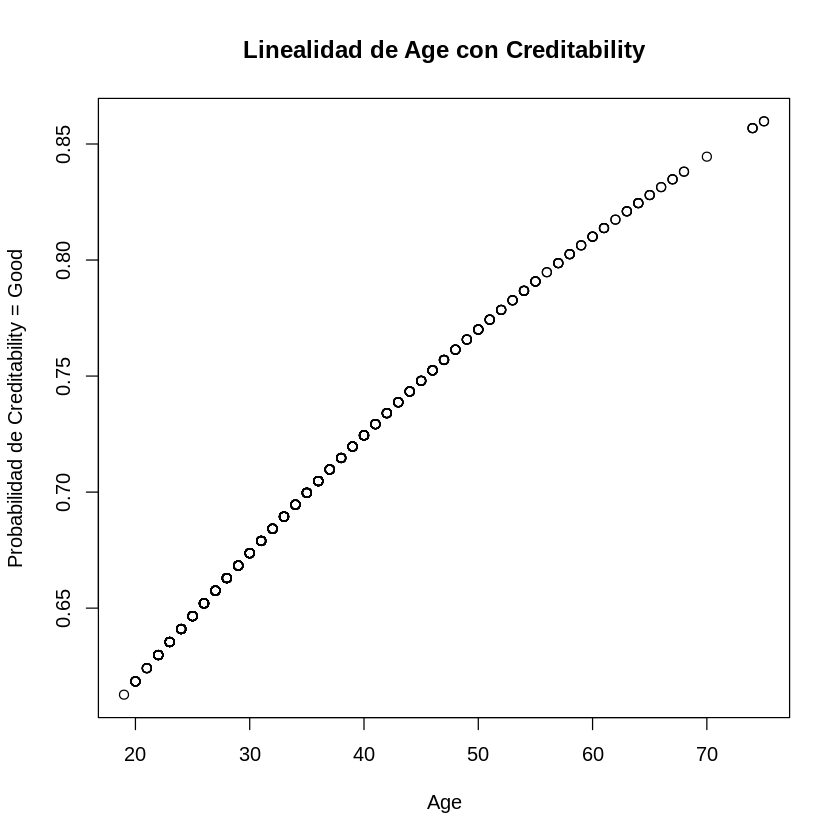

P-valor para Duration : 1.343887e-08 


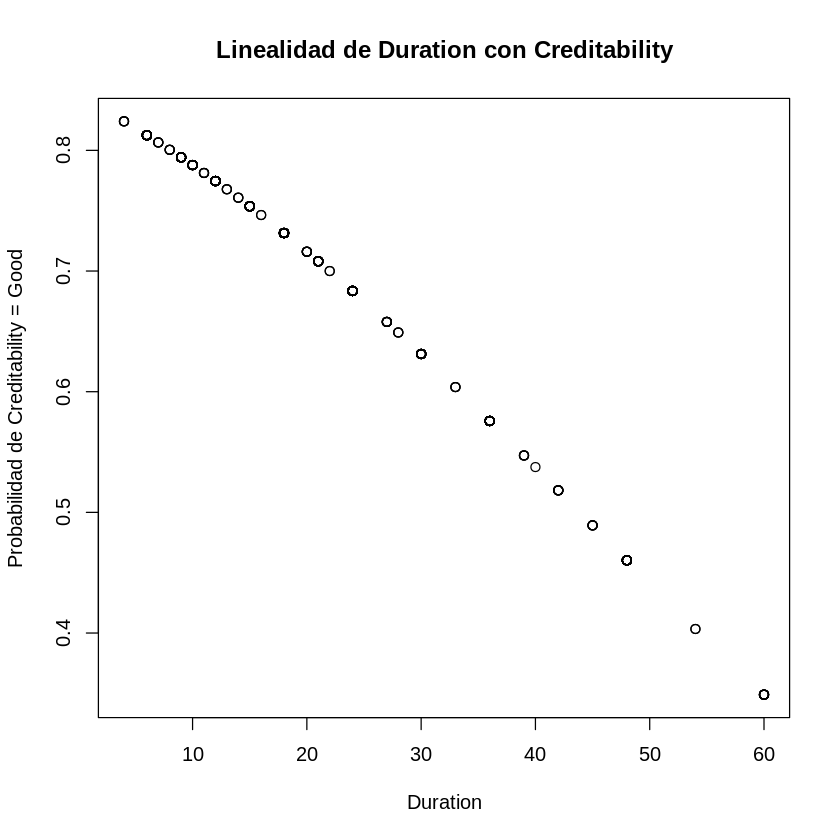

P-valor para Amount : 5.740636e-06 


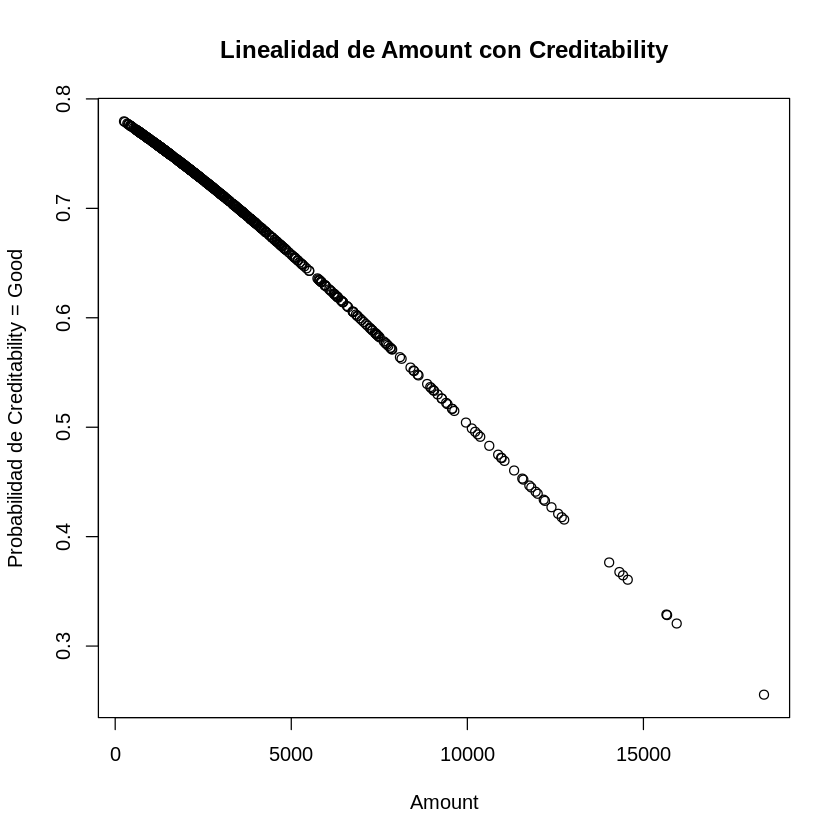

In [ ]:
continuous_vars <- c("Age", "Duration", "Amount")

# Ajustar un modelo de regresión logística con cada variable continua
for (var in continuous_vars) {
  model <- glm(Creditability ~ ., data = train_data[, c("Creditability", var)], family = binomial)
  predicted_prob <- predict(model, type = "response")
  p_value <- summary(model)$coefficients[2, "Pr(>|z|)"]  # Obtener el p-valor de la variable continua

  plot(train_data[[var]], predicted_prob, xlab = var, ylab = "Probabilidad de Creditability = Good",
       main = paste("Linealidad de", var, "con Creditability"))

  cat("P-valor para", var, ":", p_value, "\n")
}

Se observa que todas las variables continuas son significativas en el modelo, y por tanto se puede considerar una relación lineal con el log-odds de la variable respuesta.

Por tanto, se considerarán como variables a tener en cuenta en el modelo de regresión logística.

Hay variables como Savings, Employment_length y Instalment que podrían tratarse claramente como ordinales, ya que sus categorías presentan un cierto orden.

Se estudia la posibilidad de codificar cada categoría con un número en representación de su orden, observando si cumplen una relación lineal sobre el log-odds de la variable respuesta al realizar esta transformación.

Para ello , entrenamos un modelo de regresión logística frente a la variable respuesta y vemos si es significativo:

P-valor Savings: 3.948948e-06 
P-valor Employment Length: 0.0008811126 
P-valor Instalment: 0.2164654 


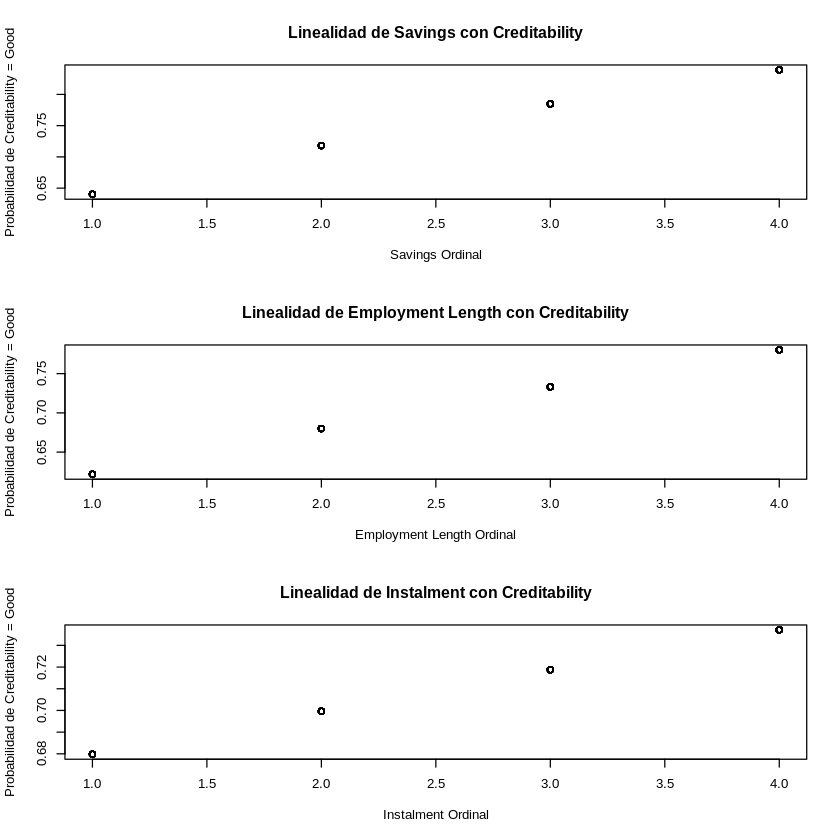

In [ ]:

# Ajustar un modelo de regresión logística con las variables codificadas
model_savings <- glm(Creditability ~ Savings_ord, data = train_data, family = binomial)
model_employment <- glm(Creditability ~ Employment_Length_ord, data = train_data, family = binomial)
model_instalment <- glm(Creditability ~ Instalment_ord, data = train_data, family = binomial)

# Predecir las probabilidades ajustadas para cada variable codificada
predicted_prob_savings <- predict(model_savings, type = "response")
predicted_prob_employment <- predict(model_employment, type = "response")
predicted_prob_instalment <- predict(model_instalment, type = "response")

# Graficar la variable codificada versus las probabilidades ajustadas
par(mfrow = c(3, 1))  # Dividir el área de trazado en 3 filas y 1 columna

# Para Savings
plot(train_data$Savings_ord, predicted_prob_savings, xlab = "Savings Ordinal", ylab = "Probabilidad de Creditability = Good", main = "Linealidad de Savings con Creditability")
cat("P-valor Savings:", summary(model_savings)$coefficients[2, "Pr(>|z|)"], "\n")

# Para Employment Length
plot(train_data$Employment_Length_ord, predicted_prob_employment, xlab = "Employment Length Ordinal", ylab = "Probabilidad de Creditability = Good", main = "Linealidad de Employment Length con Creditability")
cat("P-valor Employment Length:", summary(model_employment)$coefficients[2, "Pr(>|z|)"], "\n")

# Para Instalment
plot(train_data$Instalment_ord, predicted_prob_instalment, xlab = "Instalment Ordinal", ylab = "Probabilidad de Creditability = Good", main = "Linealidad de Instalment con Creditability")
cat("P-valor Instalment:", summary(model_instalment)$coefficients[2, "Pr(>|z|)"], "\n")


Se observa que la relación es lineal, ya que todos los modelos son significativos. Por tanto, se tendrán en cuenta estas variables ordinales codificadas para el modelo final, en lugar de las previas.

#### 3. Entrenamiento del modelo.

Una vez seleccionadas las variables y particionado el dataset, vamos a utilizar el método de stepwise regression. En este proceso, se ajustan sendos modelos de regresión con todas las posibles combinaciones de variables y se comparan en base a criterios de validación de modelos.

En el presente caso, se usan los conocidos como criterios de información, en concreto el AIC, que se calcula de la siguiente manera:

$
AIC = -2\log(L) + 2k
$

donde $L$ es la función de verosimilitud del modelo y $k$ es el número de parámetros estimados en el modelo (incluyendo el intercepto).

El AIC es una medida de la calidad relativa de un modelo estadístico. Un valor más bajo de AIC indica un mejor ajuste del modelo a los datos observados.

En primer lugar, se entrena el modelo inicial con todas las variables seleccionadas:

In [ ]:
# Paso 1: Modelo inicial con todas las variables
initial_model <- glm(Creditability ~ Account_Balance + Previous_Credit + Purpose +
                       `Sex/Martial` + Housing + Concurrent_Credits + Valuable_Asset +
                       Age + Duration + Amount + Savings_ord + Employment_Length_ord +
                       Instalment_ord, data = train_data, family = binomial(link="logit"))

summary(initial_model)


Call:
glm(formula = Creditability ~ Account_Balance + Previous_Credit + 
    Purpose + `Sex/Martial` + Housing + Concurrent_Credits + 
    Valuable_Asset + Age + Duration + Amount + Savings_ord + 
    Employment_Length_ord + Instalment_ord, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.188e+00  6.941e-01  -4.593 4.36e-06 ***
Account_BalanceNone                5.490e-01  2.496e-01   2.199 0.027849 *  
Account_BalanceSome Balance        1.832e+00  2.567e-01   7.135 9.65e-13 ***
Previous_CreditPaid Up             1.152e+00  3.786e-01   3.042 0.002352 ** 
Previous_CreditNo Problems         1.435e+00  3.862e-01   3.715 0.000203 ***
PurposeNew Car                     1.684e+00  4.159e-01   4.050 5.13e-05 ***
PurposeUsed Car                    5.697e-01  2.851e-01   1.998 0.045719 *  
PurposeHome Related                5.409e-01  2.468e-01   2.192 0.02

Se observa que la variable Employment_Length_ord no es muy signifiactiva respecto al test de Wald, por lo que seguramente no sea considerada en nuestro modelo final.

In [ ]:
stepwise_model <- step(initial_model, direction = "both", trace = 0)
summary(stepwise_model)


Call:
glm(formula = Creditability ~ Account_Balance + Previous_Credit + 
    Purpose + `Sex/Martial` + Housing + Concurrent_Credits + 
    Valuable_Asset + Age + Duration + Amount + Savings_ord + 
    Instalment_ord, family = binomial(link = "logit"), data = train_data)

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.039e+00  6.858e-01  -4.431 9.37e-06 ***
Account_BalanceNone                5.324e-01  2.487e-01   2.141 0.032269 *  
Account_BalanceSome Balance        1.841e+00  2.566e-01   7.174 7.29e-13 ***
Previous_CreditPaid Up             1.157e+00  3.767e-01   3.073 0.002122 ** 
Previous_CreditNo Problems         1.465e+00  3.840e-01   3.816 0.000136 ***
PurposeNew Car                     1.706e+00  4.179e-01   4.083 4.44e-05 ***
PurposeUsed Car                    5.439e-01  2.838e-01   1.917 0.055253 .  
PurposeHome Related                5.313e-01  2.458e-01   2.162 0.030639 *  
`Sex/Martial`Male Ma

Parece que el modelo obtenido tiene buen AIC y con casi todas las variables significativas. Se ha probado a eliminar alguna variable más no del todo significativa a un nivel de 0.05 respecto al test de Wald, pero empeoraba el AIC. Además, las variables con p-valores más altos son dummies de una categórica con parámetros bajos, por lo tanto no es conveniente eliminar la variable entera, siendo otras categorías significativas.

Se observa que no se han eliminado muchas variables respecto al modelo inicial, esto puede ser debido al ya cribado previo de variables que no tienen asociación significativa con la variable respuesta.

Por tanto, nuestro modelo final está compuesto por las variables
Account_BalanceNone, Account_BalanceSome Balance, Previous_CreditPaid Up, Previous_CreditNo Problems, PurposeNew Car, PurposeUsed Car, PurposeHome Related, Sex/MartialMale Married/Widowed, Sex/MartialFemale, HousingRented, HousingOwned, Concurrent_CreditsNone, Valuable_AssetCar, Valuable_AssetLife, Insurance, Valuable_AssetReal Estate, Age, Duration, Amount, Savings_ord e Instalment_ord.

A continuación se muestran los coeficientes y odds ratio de cada una de las variables.

In [ ]:
coeficientes<-coef(stepwise_model)
odds_ratio<-exp(coeficientes)
print("Coeficientes:")
print(coeficientes)
print("Odds Ratio:")
print(odds_ratio)

[1] "Coeficientes:"
                      (Intercept)               Account_BalanceNone 
                    -3.0391348566                      0.5324017519 
      Account_BalanceSome Balance            Previous_CreditPaid Up 
                     1.8410784569                      1.1573821815 
       Previous_CreditNo Problems                    PurposeNew Car 
                     1.4652032293                      1.7064188843 
                  PurposeUsed Car               PurposeHome Related 
                     0.5439465813                      0.5313040460 
`Sex/Martial`Male Married/Widowed               `Sex/Martial`Female 
                     0.5560738640                      0.2172750928 
                    HousingRented                      HousingOwned 
                     0.5407506227                      0.3222653818 
           Concurrent_CreditsNone                 Valuable_AssetCar 
                     0.5034192278                     -0.5802147135 
     Valuable_

Se pueden observar valores muy altos en los odds ratio en variables como Account_BalanceSome Balance, Previous_CreditNo Problems y PurposeNew Car . Esto sugiere que clientes con estas características son más propensos a devolver el credito respecto a la cetegoría de referencia en cada caso, lo cual tiene sentido.

Por otro lado, se observan valores bajos en variables como Valuable_AssetLife Insurance y Valuable_AssetReal Estate. Lo que indica que los clientes con estas características son más propensos a no devolver el crédito respecto a la categoría de referencia, que es None.

Por otro lado, se observa que en las variables continuas como Age y Amount, los odds ratio son muy cercanos a 1. Esto es debido a que su escala es mayor, por tanto el cambio en una unidad de estas caracteristicas no tiene tanto impacto sobre la variable respuesta. Para obtener unos odds ratio más interpretables en este caso, hubiese sido preciso normalizar las variables previamente.

#### 4. Evaluación del modelo

Para evaluar el rendimiento del modelo, hemos considerado medidas como el AUC (área bajo la curva ROC), precisión, exactitud y exhaustividad/recall tanto en train como en test:

$ \text{Precisión} = \frac{TP}{TP + FP} $

$ \text{Exhaustividad(Recall)} = \frac{TP}{TP + FN} $

$ \text{Exactitud(Accuracy)} = \frac{TP + TN}{Total} $

Donde:

- TP (True Positives): Instancias correctamente clasificadas como positivas.
- FP (False Positives): Instancias incorrectamente clasificadas como positivas.
- FN (False Negatives): Instancias incorrectamente clasificadas como negativas.
- TN (True Negatives): Instancias correctamente clasificadas como negativas.

In [ ]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘caTools’, ‘gplots’




Train AUC: 0.833139 
Test AUC: 0.7277249 
Train Precision: 0.8979592 
Test Precision: 0.8285714 
Train Accuracy: 0.7871429 
Test Accuracy: 0.72 
Train Recall: 0.8163265 
Test Recall: 0.7837838 


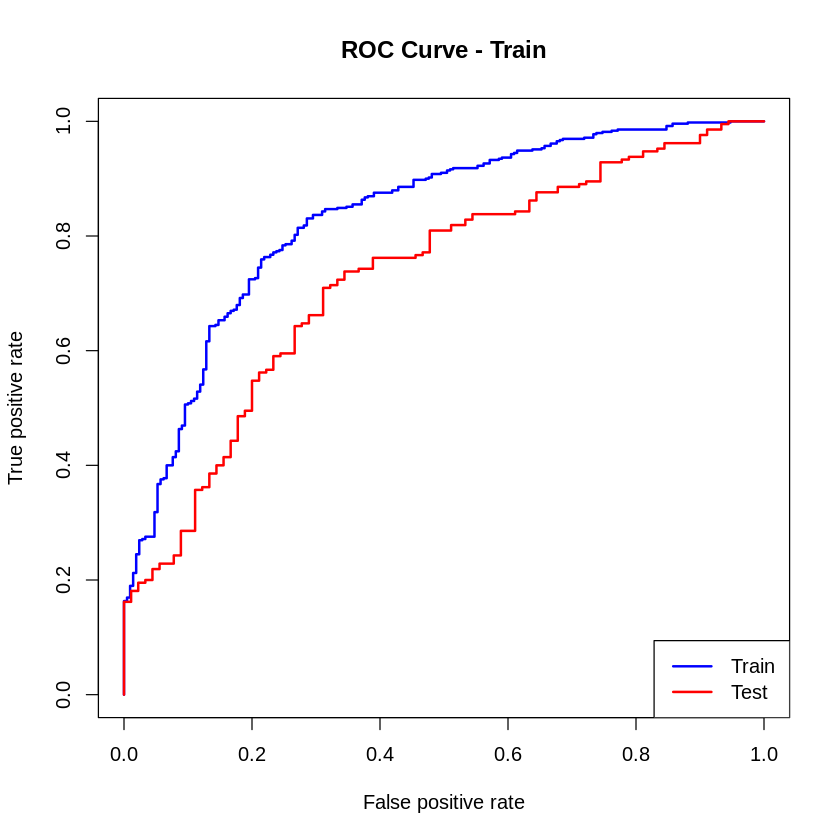

In [ ]:
predicted_prob_train <- predict(stepwise_model, newdata = train_data, type = "response")
predicted_prob_test <- predict(stepwise_model, newdata = test_data, type = "response")

prediction_train <- prediction(predicted_prob_train, as.numeric(train_data$Creditability) - 1)
prediction_test <- prediction(predicted_prob_test, as.numeric(test_data$Creditability) - 1)

# Calcular la curva ROC y el AUC para train y test
roc_train <- performance(prediction_train, "tpr", "fpr")
roc_test <- performance(prediction_test, "tpr", "fpr")

# Calcular el AUC para train y test
auc_train <- performance(prediction_train, "auc")
auc_test <- performance(prediction_test, "auc")

# Calcular precision, accuracy y recall para train
confusion_matrix_train <- table(predicted_prob_train > 0.5, train_data$Creditability)
precision_train <- confusion_matrix_train[2,2] / sum(confusion_matrix_train[,2])
accuracy_train <- sum(diag(confusion_matrix_train)) / sum(confusion_matrix_train)
recall_train <- confusion_matrix_train[2,2] / sum(confusion_matrix_train[2,])

# Calcular precision, accuracy y recall para test
confusion_matrix_test <- table(predicted_prob_test > 0.5, test_data$Creditability)
precision_test <- confusion_matrix_test[2,2] / sum(confusion_matrix_test[,2])
accuracy_test <- sum(diag(confusion_matrix_test)) / sum(confusion_matrix_test)
recall_test <- confusion_matrix_test[2,2] / sum(confusion_matrix_test[2,])

# Imprimir resultados
cat("Train AUC:", auc_train@y.values[[1]], "\n")
cat("Test AUC:", auc_test@y.values[[1]], "\n")
cat("Train Precision:", precision_train, "\n")
cat("Test Precision:", precision_test, "\n")
cat("Train Accuracy:", accuracy_train, "\n")
cat("Test Accuracy:", accuracy_test, "\n")
cat("Train Recall:", recall_train, "\n")
cat("Test Recall:", recall_test, "\n")

# Graficar la curva ROC

plot(roc_train, main = "ROC Curve - Train", col = "blue", lwd = 2)
plot(roc_test, col = "red",lwd=2, add=TRUE)

legend("bottomright", c("Train", "Test"), col = c("blue", "red"), lty = 1, lwd = 2)



Obviamente, las métricas en Train son mejores a las de Test, por lo que parece haber un ligero sobreajuste, aunque esto suele ser habitual.
Aún así, parece que los resultados son notables, y los valores en el AUC son bastante altos, corroborado con las métricas de precisión y recall, que garantizan que se consiguen buenas predicciones tanto de la clase positiva como negativa.

Se observa también una mayor precisión que recall, esto puede ser debido a que hay más clientes de clase positiva que negativa, por lo que se tiende a predecir mejor la positiva.

Se han valorado técnicas de subsampling y oversampling para equilibrar las muestras antes del entrenamienro, sin éxito.

## **Tarea 3**



En la realidad, muchos de los clientes no presentan sus ahorros al banco, ya que estos datos son privados.

Sin embargo, otro de los intereses de los bancos es intentar saber cuáles son los ahorros de sus clientes, por si no tienen una cuenta de ahorro abierta en su banco y tienen buena cantidad de dinero ahorrada, hacer una campaña de marketing hacia ellos mediante correos etc..

Por tanto, estamos otra vez ante un modelo predictivo.

Para este estudio, hemos realizado un modelo de regresión logistica ordinal o también denominado modelo logit con odds proporcionales. Nuestra variable objetivo será Savings_ord, y las variables explicativas todas las demás menos la variable Creditability, ya que en la mayoría de los casos no vamos a disponer de esa información y sería trampa.

La función de probabilidad acumulada en un modelo de regresión logística ordinal se puede expresar como:

$ P(Y \leq j | X) = F(\alpha_j + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p) $

Los logaritmos de las odds de pertenecer a la categoría \( j \) (comparado con todas las categorías anteriores) se expresan como:

$ \log \left( \frac{P(Y = j | X)}{1 - P(Y = j | X)} \right) = \alpha_j + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p $

donde $\alpha_j $ es el parámetro de corte asociado con la categoría $ j $ de $ Y $, y $ \beta_1, \beta_2, ..., \beta_p $ son los coeficientes de regresión asociados con las variables predictoras $ X_1, X_2, ..., X_p $.

Este modelo nos permite predecir el nivel de ahorros de un cliente en función de las variables explicativas seleccionadas. En este caso, la variable respuesta tendrá 4 niveles, por lo que $j \in \{1,2,3,4\}$.

In [ ]:
# Cargar la librería MASS y VGAM si no está cargada
if (!requireNamespace("MASS", quietly = TRUE)) {
  install.packages("MASS")
}
library(MASS)

if (!requireNamespace("VGAM", quietly = TRUE)) {
  install.packages("VGAM")
}
library(VGAM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: splines


Attaching package: ‘VGAM’


The following object is masked from ‘package:caret’:

    predictors




Se eliminan las variables Instalments, Savings_ord y Employment_Length para que no haya multicolinealidad (ya que el modelo incluye Instalments_ord, Employment_Length_ord y Savings).

In [ ]:
# Eliminar las variables del conjunto de entrenamiento
train_data_reg <- train_data[, !names(train_data) %in% c("Instalment", "Savings", "Employment_Length","Creditability")]

test_data_reg <- test_data[, !names(test_data) %in% c("Instalment", "Savings", "Employment_Length", "Creditability")]

In [ ]:
#Estructura conjunto de datos
str(train_data_reg)

'data.frame':	700 obs. of  19 variables:
 $ Account_Balance      : Factor w/ 3 levels "No account","None",..: 1 1 1 1 1 1 1 3 2 1 ...
 $ Duration             : int  18 9 12 12 10 8 6 18 24 11 ...
 $ Previous_Credit      : Factor w/ 3 levels "Some Problems",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Purpose              : Factor w/ 4 levels "Other","New Car",..: 3 1 1 1 1 1 1 4 4 1 ...
 $ Amount               : int  1049 2799 2122 2171 2241 3398 1361 1098 3758 3905 ...
 $ Sex/Martial          : Factor w/ 3 levels "Male Divorced/Single",..: 1 2 2 2 2 2 2 1 1 2 ...
 $ Guarantors           : Factor w/ 2 levels "None","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Duration_Adress      : Factor w/ 4 levels "< 1 Year","[1,4)",..: 4 2 2 4 3 4 4 4 4 2 ...
 $ Valuable_Asset       : Factor w/ 4 levels "None","Car","Life Insurance",..: 2 1 1 2 1 1 1 3 4 1 ...
 $ Age                  : int  21 36 39 38 48 39 40 65 23 36 ...
 $ Concurrent_Credits   : Factor w/ 2 levels "Other Banks or Dept Stores",..: 2 2 2 1 2 2 2 2 2 2 ..

Pasamos la variable respuesta a ordinal ordenada:

In [ ]:
train_data_reg$Savings_ord <- ordered(train_data_reg$Savings_ord)

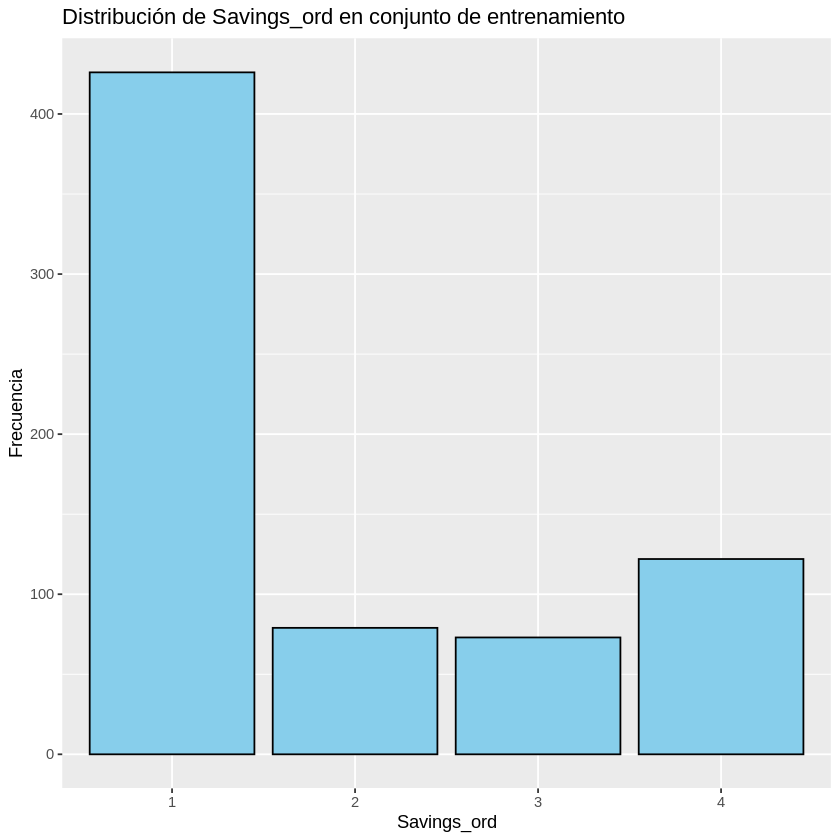

In [ ]:
# Gráfico de barras de la variable Savings_ord
ggplot(train_data_reg, aes(x = Savings_ord)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Distribución de Savings_ord en conjunto de entrenamiento",
       x = "Savings_ord", y = "Frecuencia")

Se observa que la categoría predominante es la 1 (sin ahorros). Esto puede dar problemas a la hora de crear nuestro modelo, ya que lo ideal sería partir de una muestra balanceada para evitar condicionar al modelo.

#### Filtrado previo de variables:

Para las variables numéricas, se estudia la correlación entre variables para evitar multicolinealidad

In [ ]:
# Filtrar solo las columnas numéricas
numeric_columns <- sapply(train_data_reg, is.numeric)
train_data_numeric <- train_data_reg[, numeric_columns]

# Calcular la matriz de correlación
correlation_matrix <- cor(train_data_numeric)

# Visualizar la matriz de correlación
print(correlation_matrix)


                         Duration      Amount          Age
Duration               1.00000000 0.620968504 -0.017574845
Amount                 0.62096850 1.000000000  0.005860171
Age                   -0.01757484 0.005860171  1.000000000
Employment_Length_ord  0.10949343 0.021523751  0.309932325
Instalment_ord        -0.07501152 0.279346225 -0.021862892
                      Employment_Length_ord Instalment_ord
Duration                         0.10949343    -0.07501152
Amount                           0.02152375     0.27934623
Age                              0.30993232    -0.02186289
Employment_Length_ord            1.00000000    -0.13561002
Instalment_ord                  -0.13561002     1.00000000


No hay ninguna correlación muy alta mayor de 0.85, asique conservamos todas a priori.

Veamos los p-valores en los Test de Chi-Cuadrado en las variables categóricas frente a la variable respuesta ordinal Savings_ord, viendo así si existe asociación significativa.

In [ ]:
# Realizar un análisis univariado para identificar variables poco relevantes o redundantes
univariate_analysis <- lapply(names(train_data_reg), function(var) {
  if (is.factor(train_data_reg[[var]])) {
    table <- table(train_data_reg[[var]], train_data_reg$Savings_ord)
    chi_squared <- chisq.test(table)$p.value
    cat("Variable:", var, "- Test chi-cuadrado p-valor:", chi_squared, "\n")
    return(list(variable = var, chi_squared = chi_squared))
  } else {
    return(NULL)
  }
})

Variable: Account_Balance - Test chi-cuadrado p-valor: 5.311293e-13 
Variable: Previous_Credit - Test chi-cuadrado p-valor: 0.5952604 
Variable: Purpose - Test chi-cuadrado p-valor: 0.001799233 
Variable: Sex/Martial - Test chi-cuadrado p-valor: 0.1506532 
Variable: Guarantors - Test chi-cuadrado p-valor: 0.009932862 
Variable: Duration_Adress - Test chi-cuadrado p-valor: 0.07130423 
Variable: Valuable_Asset - Test chi-cuadrado p-valor: 0.02848637 
Variable: Concurrent_Credits - Test chi-cuadrado p-valor: 0.9365908 
Variable: Housing - Test chi-cuadrado p-valor: 0.5280153 
Variable: Num_Credits - Test chi-cuadrado p-valor: 0.912286 


Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”


Variable: Occupation - Test chi-cuadrado p-valor: 0.4141563 
Variable: Num_Dependents - Test chi-cuadrado p-valor: 0.4459643 
Variable: Telephone - Test chi-cuadrado p-valor: 0.1300213 
Variable: Savings_ord - Test chi-cuadrado p-valor: 0 


Se observa que sólo existe asociación significativa en las variables Account_Balance, Purpose, Guarantors, Duration_Adress, Occupation y Telephone.

Veamos los p-valores asociados a entrenar las variables continuas frente a la variable respuesta. Si son significativas, es que hay una relación lineal.

In [ ]:
# Variables numéricas en el dataset
numeric_vars <- sapply(train_data_reg, is.numeric)
numeric_vars <- names(numeric_vars[numeric_vars])

# Ajustar un modelo de regresión logística ordinal uno a uno para cada variable numérica
for (var in numeric_vars) {
  # Ajustar el modelo
  fit_model <- vglm(Savings_ord ~ ., family = cumulative(parallel = TRUE), data = train_data_reg[, c(var, "Savings_ord")])

  # Obtener el resumen del modelo
  print(summary(fit_model))
}


Call:
vglm(formula = Savings_ord ~ ., family = cumulative(parallel = TRUE), 
    data = train_data_reg[, c(var, "Savings_ord")])

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  0.77700    0.15364   5.057 4.25e-07 ***
(Intercept):2  1.28991    0.15887   8.119 4.68e-16 ***
(Intercept):3  1.89674    0.16907  11.219  < 2e-16 ***
Duration      -0.01585    0.00617  -2.568   0.0102 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: logitlink(P[Y<=1]), logitlink(P[Y<=2]), 
logitlink(P[Y<=3])

Residual deviance: 1517.615 on 2096 degrees of freedom

Log-likelihood: -758.8074 on 2096 degrees of freedom

Number of Fisher scoring iterations: 3 

No Hauck-Donner effect found in any of the estimates


Exponentiated coefficients:
 Duration 
0.9842792 

Call:
vglm(formula = Savings_ord ~ ., family = cumulative(parallel = TRUE), 
    data = train_data_reg[, c(var, "Savings_ord")])

Coefficients: 
                Esti

Parece que se puede considerar que existe asociación significativa a un nivel de significación de 0.20 en las variables Age, Duration, Amount y Employment_Length_ord.

#### Entrenamiento del modelo:

Se crea un modelo inicial donde se incluyen todas las variables que tienen asociación con la variable respuesta:

In [ ]:
vars_to_include <- c("Age","Duration","Amount","Employment_Length_ord","Telephone","Occupation","Duration_Adress","Guarantors","Account_Balance","Sex/Martial","Purpose")

# Ajustar el modelo de regresión logística ordinal con polr
fit_model2 <- polr(Savings_ord ~ ., data = train_data_reg[, c(vars_to_include, "Savings_ord")])

summary(fit_model2)


Re-fitting to get Hessian


Warning message in sqrt(diag(vc)):
“NaNs produced”


Call:
polr(formula = Savings_ord ~ ., data = train_data_reg[, c(vars_to_include, 
    "Savings_ord")])

Coefficients:
                                            Value Std. Error   t value
Age                                    -4.810e-03    0.00732  -0.65708
Duration                                1.020e-02        NaN       NaN
Amount                                  3.202e-05        NaN       NaN
Employment_Length_ord                   1.575e-01    0.07784   2.02339
TelephoneYes                            1.180e-01    0.16658   0.70819
OccupationUnskilled Permanent Resident -2.640e-01    0.15722  -1.67927
OccupationSkilled                      -6.871e-02    0.11365  -0.60455
OccupationExecutive                    -5.634e-01    0.15230  -3.69902
Duration_Adress[1,4)                    2.533e-01    0.12244   2.06892
Duration_Adress[4,7)                    4.711e-01    0.14409   3.26962
Duration_Adress> 7                      4.088e-01    0.12454   3.28222
GuarantorsYes                 

Una vez ajustado el modelo inicial, aplicamos el método de stepwise respecto al AIC, con el objetivo de incluir las variables en el modelo que lo minimicen:

In [ ]:
# Realizar selección de variables stepwise utilizando AIC
step_model2 <- stepAIC(fit_model2, direction = "both")

# Ver el resumen del modelo seleccionado
summary(step_model2)

Start:  AIC=1473.26
Savings_ord ~ Age + Duration + Amount + Employment_Length_ord + 
    Telephone + Occupation + Duration_Adress + Guarantors + Account_Balance + 
    `Sex/Martial` + Purpose

                        Df    AIC
- `Sex/Martial`          2 1470.0
- Duration_Adress        3 1470.2
- Age                    1 1471.6
- Telephone              1 1471.7
- Amount                 1 1471.9
- Occupation             3 1471.9
- Duration               1 1472.7
<none>                     1473.3
- Purpose                3 1474.0
- Employment_Length_ord  1 1475.0
- Guarantors             1 1477.3
- Account_Balance        2 1516.8

Step:  AIC=1469.98
Savings_ord ~ Age + Duration + Amount + Employment_Length_ord + 
    Telephone + Occupation + Duration_Adress + Guarantors + Account_Balance + 
    Purpose

                        Df    AIC
- Duration_Adress        3 1466.9
- Age                    1 1468.2
- Telephone              1 1468.3
- Occupation             3 1468.4
- Amount          


Re-fitting to get Hessian




Call:
polr(formula = Savings_ord ~ Duration + Employment_Length_ord + 
    Guarantors + Account_Balance + Purpose, data = train_data_reg[, 
    c(vars_to_include, "Savings_ord")])

Coefficients:
                               Value Std. Error t value
Duration                     0.01494   0.006554   2.280
Employment_Length_ord        0.17822   0.072419   2.461
GuarantorsYes               -0.76527   0.329331  -2.324
Account_BalanceNone          1.10880   0.240296   4.614
Account_BalanceSome Balance  1.46747   0.225659   6.503
PurposeNew Car               0.37194   0.267323   1.391
PurposeUsed Car             -0.34262   0.236969  -1.446
PurposeHome Related         -0.22156   0.182791  -1.212

Intercepts:
    Value   Std. Error t value
1|2  2.0799  0.3088     6.7361
2|3  2.6486  0.3150     8.4093
3|4  3.3000  0.3235    10.2024

Residual Deviance: 1438.44 
AIC: 1460.44 

Finalmente, el modelo final ajustado solo incluye las variables Account_Balance, Purpose, Guarantors, Employment_Length_ord y Duration.

Aunque no lo parezca, tiene sentido que Duration_Adress sea tan relevante, ya que puede haber correlación en el tiempo que ha pasado desde que te compraste una casa y los ahorros que tienes.

Veamos los odds_ratio del modelo:

In [ ]:
# Calcular los odds ratios del modelo final
odds_ratios <- cbind(OR=exp(coef(step_model2)))

print(odds_ratios)

                                   OR
Duration                    1.0150557
Employment_Length_ord       1.1950853
GuarantorsYes               0.4652065
Account_BalanceNone         3.0307144
Account_BalanceSome Balance 4.3382251
PurposeNew Car              1.4505436
PurposeUsed Car             0.7099088
PurposeHome Related         0.8012685


Se observa con los odds ratio que:
- Tener algún saldo en la cuenta está asociado con aproximadamente 4 veces mayores probabilidades de tener mayores ahorros en comparación con no tener cuenta (categoría de referencia).
- Solicitar un préstamo para un automóvil nuevo  está asociado con aproximadamente 1.45 veces más probabilidad de tener mayores ahorros en comparación con los que solicitan prestamos para otros propósitos. Sin embargo, para un coche usado, la probabilidad desciende a 0.70, lo que parece bastante lógico.
- Tener un garante (GuarantorsYes) está asociado con aproximadamente 0.46 veces las probabilidades de tener más ahorros en comparación con no tener un garante/fiador.
- También se puede observar, que el llevar mayor tiempo en el trabajo está asociado a mayores ahorros, a su vez que pedir un crédito a más largo plazo, aunque en menor medida.

#### Evaluación del modelo:

Para evaluar el modelo, hemos elegido por un lado el Accuracy(precisión) para saber para cuántos clientes adivina el nivel de sus ahorros. Por otro lado, hemos considerado el MAE (Mean Absolute Error), para medir cuando se equivoca de nivel, en qué medida lo hace. Esto es debido a que no es lo mismo equivocarse de no tener ahorros a tener muchos, que equivocarse de no tener ahorros a tener muy pocos, por ejemplo.

Veamos la evaluación en el train:

In [ ]:
# Predicción en el conjunto de entrenamiento
train_pred <- predict(step_model2, newdata = train_data_reg, type = "class")

train_pred_int <- as.integer(train_pred)

Savings_ord_int <- as.integer(train_data_reg$Savings_ord)

train_accuracy <- sum(train_pred_int == Savings_ord_int) / length(train_pred_int)

cat("Precisión en conjunto de entrenamiento:", train_accuracy, "\n")

train_mae <- mean(abs(train_pred_int - Savings_ord_int))

cat("MAE en conjunto de entrenamiento:", train_mae, "\n")

Precisión en conjunto de entrenamiento: 0.6128571 
MAE en conjunto de entrenamiento: 0.8328571 


Y la evaluación en test:

In [ ]:
# Precisión en el conjunto de test
test_data_reg$Savings_ord <- ordered(test_data_reg$Savings_ord)

test_pred <- predict(step_model2, newdata = test_data_reg, type = "class")

test_pred_int <- as.integer(test_pred)

Savings_ord_int_test <- as.integer(test_data_reg$Savings_ord)

test_accuracy <- sum(test_pred_int == Savings_ord_int_test) / length(test_pred_int)

cat("Precisión en conjunto de test:", test_accuracy, "\n")

test_mae <- mean(abs(test_pred_int - Savings_ord_int_test))

cat("MAE en conjunto de test:", test_mae, "\n")

Precisión en conjunto de test: 0.5933333 
MAE en conjunto de test: 0.93 


Se observa que la actuación tanto en train como en test es aceptable, pero no brillante. Esto puede a ser debido al desbalanceo entre niveles de la variable respuesta. También puede influir que la base de datos estaba preparada para estudiar el riesgo en la concesión o no de créditos. Si el objetivo fuese predecir el ahorro de sus clientes, a lo mejor conviene considerar algunas variables extra.

Aún así, el modelo entrenado parece bastante coherente respecto a sus odds ratio, y se puede considerar como un buen modelo final.